<a href="https://colab.research.google.com/github/Projas-14/Inteligencia_artificial/blob/master/Redes%20neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4: Redes Neuronales
**Inteligencia Artificial - ICI3244**

Integrantes:
*   Victor Granda
*   Ramiro Magnatera
*   Benjamin Rojas
*   Paul Rojas
*   Vicente Sarabia

# Introdución

Este laboratorio se enfoca en el estudio y aplicación de conceptos y métodos fundamentales en el campo del *aprendizaje supervisado*, con especial énfasis en la **clasificación y regresión** utilizando **redes neuronales** como herramientas de modelado.

El laboratorio utiliza el conjunto de datos del vino portugués (*winequality-red.csv* y *winequality-white.csv*), este conjunto de datos proporciona información detallada sobre varios atributos de los *vinos tintos y blancos* y permite un análisis del rendimiento de los modelos de clasificación y regresión implementados.

Un aspecto importante a destacar en este laboratorio es la adición de una columna `quality_class` que asigna categorías de calidad a los vinos, brindando una perspectiva adicional para evaluar el desempeño del modelo implementado.

Una de las tareas principales de este laboratorio es implementar redes neuronales, para este notebook se crearan utilizando **Tensorflow**, una libreria de aprendizaje automático ampliamente utilizada que se ha demostrado que es efectiva para una amplia variedad de problemas.

Esto requiere diseñar y entrenar un modelo de clasificación basado en redes neuronales donde su capa de salida se adapta al número de clases a clasificar. También necesitamos un modelo de regresión que pueda estimar la calidad del vino.

Para evaluar con precisión el rendimiento del modelo, se aplica la técnica ***k-fold cross validation***. Este es un método de validación cruzada que asegura la robustez y generalización de los resultados obtenidos.

Finalmente, se realiza un análisis comparativo de los errores introducidos por el uso de diferentes funciones de activación en TensorFlow, en la función logística *(sigmoidea)* y la función tangente hiperbólica ($\tanh$). Este análisis permitirá evaluar el impacto de la elección de la función de activación en el rendimiento de los modelos implementados y proporcionará una comprensión más profunda de su comportamiento en el contexto de este laboratorio.




In [ ]:
!git clone "https://github.com/benjarojas/lab2_ia.git" # clone dataset -> lab2_ia/

Cloning into 'lab2_ia'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), 93.18 KiB | 1.79 MiB/s, done.


In [ ]:
# Importa las bibliotecas
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold


import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

sns.set_style('darkgrid')

In [ ]:
# Almacena los datos en el DataFrame llamado "dataset_red" y "dataset_white".
dataset_red = pd.read_csv(os.path.join("lab2_ia/", "winequality-red.csv"), sep=";")
dataset_white = pd.read_csv(os.path.join("lab2_ia/", "winequality-white.csv"), sep=";")

# Dataset Red

In [ ]:
#muestra las primeras filas
dataset_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Label de clase
Se agrega la etiqueta `quality_class` que va a calificar cada vino en base al atributo `quality` en `LowQuality`, `Average` o `HighQuality`

In [ ]:
# Extrae la columna 'quality' del dataset 'dataset_red'.
columnaQuality = dataset_red['quality']

# Se aplica una función lambda para asignar etiquetas de clasificación:
#'lowquality' si quality es menor que 5
#'average' si quality es igual a 5
#'highquality' en cualquier otro caso.
columnaQuality = columnaQuality.apply(lambda x: 'lowquality' if x < 5 else 'average' if x == 5 else 'highquality')

# Inserta una nueva columna llamada 'quality_class' en la posición 12 del dataset 'dataset_red'
dataset_red.insert(12, 'quality_class',np.array(columnaQuality))

In [ ]:
# Muestra las primeras filas y la nueva columna "quality_class"
dataset_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,average
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,average
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,average
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,highquality
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,average


## Clasificación y regresión utilizando función sigmoidea

### Clasificación

Creamos un modelo de clasificación basado en redes neuronales, utilizando la función sigmoide como función de activación. La arquitectura del modelo consiste en una capa de entrada, una capa oculta densa con 64 neuronas, otra con 32 y una capa de salida con 3 neuronas correspondientes a cada clase.

In [ ]:
# Crea el dataset 'X_dataset_red' eliminando la columna 'quality_class' de 'dataset_red'
X_dataset_red = dataset_red.drop('quality_class', axis=1)

# Almacena las etiquetas 'quality_class' del dataset original
y = dataset_red['quality_class']

# Encode
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = keras.utils.to_categorical(y)

# Dividir los datos en sets de entrenamiento y de testing
X_train, X_test, y_train, y_test = train_test_split(X_dataset_red, y, test_size=0.2, random_state=42)

# Creamos el modelo
model = Sequential()

# Capa de entrada
model.add(Dense(units=64, activation='sigmoid', input_shape=(12,)))

# Capa ocultas
model.add(Dense(units=32, activation='sigmoid'))

# Capa de salida
num_classes = len(label_encoder.classes_)
model.add(Dense(units=num_classes, activation='sigmoid'))

# Compilamos el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamos el modelo con 20 épocas
model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

# Evaluamos el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# variables de tabla de comparacion
loss_clas_sigmoide = loss
accuracy_clas_sigmoide = accuracy

Epoch 1/20
40/40 [==============================] - 1s 9ms/step - loss: 0.8532 - accuracy: 0.5364 - val_loss: 0.7887 - val_accuracy: 0.6219
Epoch 2/20
40/40 [==============================] - 0s 3ms/step - loss: 0.7881 - accuracy: 0.6192 - val_loss: 0.7617 - val_accuracy: 0.6250
Epoch 3/20
40/40 [==============================] - 0s 3ms/step - loss: 0.7679 - accuracy: 0.6263 - val_loss: 0.7510 - val_accuracy: 0.6250
Epoch 4/20
40/40 [==============================] - 0s 3ms/step - loss: 0.7549 - accuracy: 0.6458 - val_loss: 0.7360 - val_accuracy: 0.6281
Epoch 5/20
40/40 [==============================] - 0s 3ms/step - loss: 0.7380 - accuracy: 0.6403 - val_loss: 0.7235 - val_accuracy: 0.6375
Epoch 6/20
40/40 [==============================] - 0s 3ms/step - loss: 0.7265 - accuracy: 0.6505 - val_loss: 0.7104 - val_accuracy: 0.6250
Epoch 7/20
40/40 [==============================] - 0s 3ms/step - loss: 0.7125 - accuracy: 0.6575 - val_loss: 0.6934 - val_accuracy: 0.6406
Epoch 8/20
40/40 [==

#### **Matriz de Confusión**

Creamos una matriz de confusión para visualizar el rendimiento del modelo

10/10 [==============================] - 0s 2ms/step


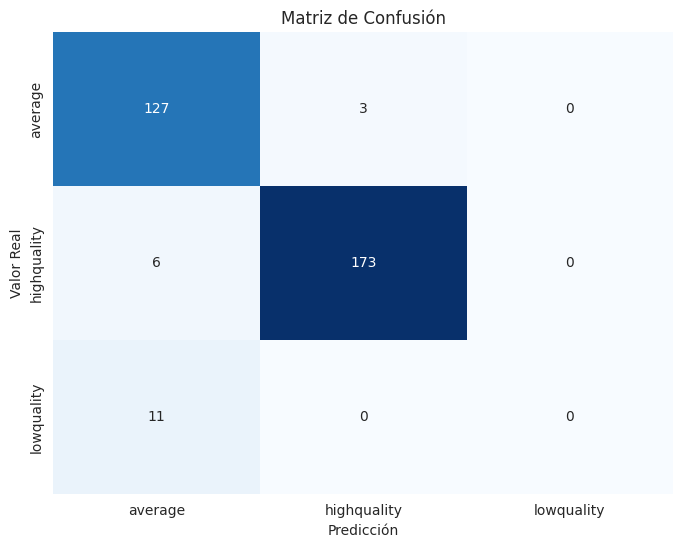

In [ ]:
#Se realizan predicciones del modelo y se guardan los valores reales esperados
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

#Se genera la matriz de confusión
confusion = confusion_matrix(true_labels, predicted_labels)

#Se muestra por pantalla la matriz de confusión
plt.figure(figsize=(8, 6))
axis_labels=label_encoder.classes_
sns.heatmap(confusion, annot=True, xticklabels=axis_labels, yticklabels=axis_labels, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

#### **K-Fold Cross Validation**

In [ ]:
# Inputs y Targets
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

k = 5
kfold = KFold(n_splits=k, shuffle=True)

acc_per_fold = []
loss_per_fold = []

# Evaluación de modelo usando K-Fold Cross Validation
fold_num = 1
for train, test in kfold.split(inputs, targets):

  # Definimos la arquitectura usada por el modelo
  model = Sequential()
  model.add(Dense(units=64, activation='sigmoid', input_shape=(12,)))
  model.add(Dense(units=32, activation='sigmoid'))
  model.add(Dense(units=3, activation='sigmoid'))

  # Compilamos el modelo
  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

  # Imprimimos cada fold
  print('------------------------------------------------------------------------')
  print(f'Entrenando para fold {fold_num} ...')

  # Entrenamos el modelo
  history = model.fit(inputs[train], targets[train],
              batch_size=32,
              epochs=20,
              verbose=False)

  # Generamos métricas
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Resultados para fold {fold_num}: {model.metrics_names[0]} de {scores[0]}; {model.metrics_names[1]} de {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Siguiente fold
  fold_num = fold_num + 1

print()
print(f'Loss promedio: {sum(loss_per_fold)/len(loss_per_fold)}')
print(f'Accuracy promedio: {sum(acc_per_fold)/len(acc_per_fold)}%')

# variables de tabla de comparacion
loss_clas_promedio_fold_sigmoide = sum(loss_per_fold)/len(loss_per_fold)
accuracy_clas_promedio_fold_sigmoide = sum(acc_per_fold)/len(acc_per_fold)

------------------------------------------------------------------------
Entrenando para fold 1 ...
Resultados para fold 1: loss de 0.3834196925163269; accuracy de 91.25000238418579%
------------------------------------------------------------------------
Entrenando para fold 2 ...
Resultados para fold 2: loss de 0.36760297417640686; accuracy de 94.0625011920929%
------------------------------------------------------------------------
Entrenando para fold 3 ...
Resultados para fold 3: loss de 0.3811279833316803; accuracy de 90.625%
------------------------------------------------------------------------
Entrenando para fold 4 ...
Resultados para fold 4: loss de 0.39192894101142883; accuracy de 90.9375011920929%
------------------------------------------------------------------------
Entrenando para fold 5 ...
Resultados para fold 5: loss de 0.3076065480709076; accuracy de 94.04388666152954%

Loss promedio: 0.3663372278213501
Accuracy promedio: 92.18377828598022%


### Regresión

Para este modelo a diferencia del de clasificación, se realizó un modelo con 1 input layer, 1 hidden layer densa de 50 neuronas que utilizan la función de activación sigmoide y una output layer, la cual no cuenta con una función de activación.

La decisión de esta composición es debido a que se quiere evitar el overfitting del modelo, es por eso que se utiliza solo una hidden layer. Mientras que la cantidad de neuronas por capa es debido a que al realizar pruebas el MSE no variaba considerablemente dependiendo de este factor, por lo cual se prefirió por dejarlo lo más simple posible en pro del tiempo de ejecución de pruebas.

Finalmente se agrega solamente una neurona en la output layer debido a que se quiere estimar un solo valor.

Es importante destacar que el algoritmo optimizador que se utiliza es el gradiente estocástico descendente, con una learning rate de 0.001 y 30 epochs.

In [ ]:
# crea una nueva variable 'X_red' que contiene todos los atributos excepto la columna 'quality'
X_red = dataset_red.drop('quality', axis=1)
#crea otra variable 'X_red' eliminando la columna 'quality_class' de 'X_red
X_red = X_red.drop('quality_class', axis=1)
# Almacenar los valores de la columna 'quality' del dataset original
y_red = dataset_red['quality']
# Conjunto de datos en conjuntos de entrenamiento y prueba utilizando la función train_test_split
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.3, random_state=42)

In [ ]:
# Modelo secuencia "modelo_sigmoide"
# Compila un modelo secuencial de redes neuronales con una capa de activación sigmoide y una capa de salida lineal
# la función de pérdida de error cuadrático medio y el optimizador SGD.
modelo_sigmoide = keras.models.Sequential([
    keras.layers.Dense(50, activation="sigmoid", input_shape=X_train_red.shape[1:]),
    keras.layers.Dense(1)
], name="modelo_sigmoide")
modelo_sigmoide.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
modelo_sigmoide.summary()

Model: "modelo_sigmoide"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 50)                600       
                                                                 
 dense_19 (Dense)            (None, 1)                 51        
                                                                 
Total params: 651
Trainable params: 651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Entrena el modelo modelo_sigmoide con los datos de entrenamiento durante 30 épocas
history = modelo_sigmoide.fit(X_train_red, y_train_red, epochs=30)

Epoch 1/30
35/35 [==============================] - 0s 1ms/step - loss: 7.4706
Epoch 2/30
35/35 [==============================] - 0s 2ms/step - loss: 0.7701
Epoch 3/30
35/35 [==============================] - 0s 1ms/step - loss: 0.6943
Epoch 4/30
35/35 [==============================] - 0s 1ms/step - loss: 0.6697
Epoch 5/30
35/35 [==============================] - 0s 1ms/step - loss: 0.6549
Epoch 6/30
35/35 [==============================] - 0s 1ms/step - loss: 0.6460
Epoch 7/30
35/35 [==============================] - 0s 2ms/step - loss: 0.6381
Epoch 8/30
35/35 [==============================] - 0s 1ms/step - loss: 0.6339
Epoch 9/30
35/35 [==============================] - 0s 1ms/step - loss: 0.6299
Epoch 10/30
35/35 [==============================] - 0s 1ms/step - loss: 0.6269
Epoch 11/30
35/35 [==============================] - 0s 2ms/step - loss: 0.6241
Epoch 12/30
35/35 [==============================] - 0s 2ms/step - loss: 0.6231
Epoch 13/30
35/35 [==============================

#### Error cuadrático medio

In [ ]:
# evalúa el modelo modelo_sigmoide en los datos de prueba y muestra el MSE resultante.
mse_test = modelo_sigmoide.evaluate(X_test_red, y_test_red)

print(f"MSE del modelo sigmoide: {mse_test}")


# variables de tabla de comparacion
Mse_reg_sigmoide = mse_test


15/15 [==============================] - 0s 2ms/step - loss: 0.5937
MSE del modelo sigmoide: 0.5936592221260071


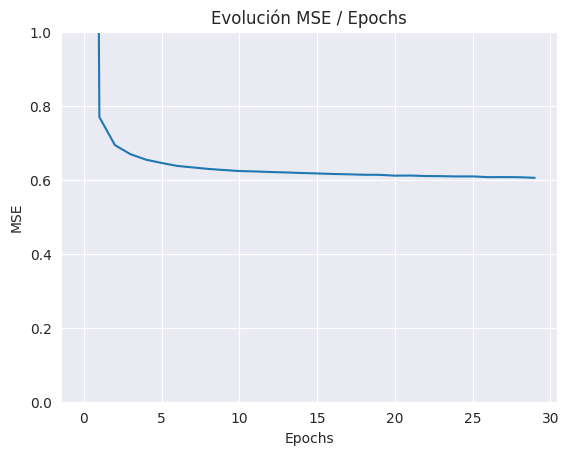

In [ ]:
# Gráfico que muestra la evolución de las métricas de entrenamiento a lo largo de las épocas para el modelo entrenado.
plt.plot(pd.DataFrame(history.history))
plt.title("Evolución MSE / Epochs")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Aquí podemos observar la evolución de la función de pérdida (MSE) a medida que van transcurriendo las iteraciones del algoritmo.

En la gráfica se logra visualizar claramente cómo en un corto tiempo disminuye considerablemente esta función, y a partir de la epoch 15 tiende a ralentizarse su progresión, con lo cual se puede suponer que se llegó a un mínimo logrado con la utilización de este modelo.

#### **K-Fold Cross Validation**

In [ ]:
# Inputs y Targets
inputs = np.concatenate((X_train_red, X_test_red), axis=0)
targets = np.concatenate((y_train_red, y_test_red), axis=0)

k = 5
kfold = KFold(n_splits=k, shuffle=True)

acc_per_fold = []
loss_per_fold = []

# Evaluación de modelo usando K-Fold Cross Validation
fold_num = 1
for train, test in kfold.split(inputs, targets):

  # Definimos la arquitectura usada por el modelo
  modelo_sigmoide = keras.models.Sequential([
  keras.layers.Dense(30, activation="sigmoid", input_shape=X_train_red.shape[1:]),
  keras.layers.Dense(1)
  ], name="modelo_sigmoide")

  # Compilamos el modelo
  modelo_sigmoide.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=['accuracy'])

  # Imprimimos cada fold
  print('------------------------------------------------------------------------')
  print(f'Entrenando para fold {fold_num} ...')

  # Entrenamos el modelo
  history = modelo_sigmoide.fit(inputs[train], targets[train],
              epochs=30,
              verbose=False)

  # Generamos métricas
  scores = modelo_sigmoide.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Resultados para fold {fold_num}: {modelo_sigmoide.metrics_names[0]} de {scores[0]}')
  loss_per_fold.append(scores[0])

  # Siguiente fold
  fold_num = fold_num + 1

print()
print(f'MSE promedio: {sum(loss_per_fold)/len(loss_per_fold)}')

# variables de tabla de comparacion
Mse_promedio_flod_sigmoide = sum(loss_per_fold)/len(loss_per_fold)



------------------------------------------------------------------------
Entrenando para fold 1 ...
Resultados para fold 1: loss de 0.6089386343955994
------------------------------------------------------------------------
Entrenando para fold 2 ...
Resultados para fold 2: loss de 0.6264740228652954
------------------------------------------------------------------------
Entrenando para fold 3 ...
Resultados para fold 3: loss de 0.600333571434021
------------------------------------------------------------------------
Entrenando para fold 4 ...
Resultados para fold 4: loss de 0.6095608472824097
------------------------------------------------------------------------
Entrenando para fold 5 ...
Resultados para fold 5: loss de 0.6621623039245605

MSE promedio: 0.6214938759803772


#### **Predicciones realizadas por el modelo**

Para visualizar con mayor detalle el funcionamiento del modelo, se ilustrarán una serie de valores de entrada, sus valores de salida reales y las predicciones realizadas por el modelo.

Se seleccionaron los últimos 5 elementos de los datos de testing debido a que se observó que eran bastante heterogéneos en sus valores $y$ esperados, con lo cual se podría visualizar si los modelos realizan una buena estimación para cada valor.

In [ ]:
# Conjunto de datos que contiene las características de prueba de "X_test_red"
X_test_red[475:481]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1468,7.3,0.48,0.32,2.1,0.062,31.0,54.0,0.99728,3.30,0.65,10.0
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0
1325,6.7,0.46,0.24,1.7,0.077,18.0,34.0,0.99480,3.39,0.60,10.6
514,10.5,0.51,0.64,2.4,0.107,6.0,15.0,0.99730,3.09,0.66,11.8
576,9.9,0.50,0.24,2.3,0.103,6.0,14.0,0.99780,3.34,0.52,10.0


In [ ]:
# Conjunto de valores objetivo que corresponden a los datos de prueba.
y_test_red[475:481]

1468    7
495     8
1325    6
514     7
576     4
Name: quality, dtype: int64

In [ ]:
# Se realiza predicciones utilizando el modelo "modelo_sigmoide" en el subconjunto de datos de prueba X_new
X_new = X_test_red[475:481]
y_pred = modelo_sigmoide.predict(X_new)
y_pred

1/1 [==============================] - 0s 52ms/step


array([[5.6385484],
       [5.821412 ],
       [5.74978  ],
       [5.827519 ],
       [5.781397 ]], dtype=float32)

## Clasificación y regresión utilizando función tangente hiperbólica

### Clasificación

Creamos un modelo de clasificación basado en redes neuronales utilizando la función $\tanh$ como función de activación. La arquitectura del modelo consiste en una capa de entrada, una capa oculta densa con 64 neuronas, otra con 32  y una capa de salida con 3 neuronas correspondientes a cada clase.

In [ ]:
# Crea el dataset 'X_dataset_red' eliminando la columna 'quality_class' de 'dataset_red'
X_dataset_red = dataset_red.drop('quality_class', axis=1)

# Almacena las etiquetas 'quality_class' del dataset original
y = dataset_red['quality_class']

# Encode
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = keras.utils.to_categorical(y)

# Dividir los datos en sets de entrenamiento y de testing
X_train, X_test, y_train, y_test = train_test_split(X_dataset_red, y, test_size=0.2, random_state=42)

# Creamos el modelo
model = Sequential()

# Capa de entrada
model.add(Dense(units=64, activation='tanh', input_shape=(12,)))

# Capa ocultas
model.add(Dense(units=32, activation='tanh'))

# Capa de salida
num_classes = len(label_encoder.classes_)
model.add(Dense(units=num_classes, activation='tanh'))

# Compilamos el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamos el modelo con 20 épocas
model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

# Evaluamos el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# variables de tabla de comparacion
loss_clas_tanH = loss
accuracy_clas_tanH = accuracy

Epoch 1/20
40/40 [==============================] - 1s 7ms/step - loss: 4.0420 - accuracy: 0.0414 - val_loss: 4.8864 - val_accuracy: 0.0437
Epoch 2/20
40/40 [==============================] - 0s 3ms/step - loss: 4.1352 - accuracy: 0.0438 - val_loss: 3.5290 - val_accuracy: 0.0344
Epoch 3/20
40/40 [==============================] - 0s 3ms/step - loss: 2.4097 - accuracy: 0.0407 - val_loss: 0.5549 - val_accuracy: 0.0344
Epoch 4/20
40/40 [==============================] - 0s 3ms/step - loss: 0.6559 - accuracy: 0.0407 - val_loss: 0.5542 - val_accuracy: 0.0344
Epoch 5/20
40/40 [==============================] - 0s 3ms/step - loss: 0.6554 - accuracy: 0.0407 - val_loss: 0.5541 - val_accuracy: 0.0344
Epoch 6/20
40/40 [==============================] - 0s 3ms/step - loss: 0.6553 - accuracy: 0.0407 - val_loss: 0.5541 - val_accuracy: 0.0344
Epoch 7/20
40/40 [==============================] - 0s 3ms/step - loss: 0.6553 - accuracy: 0.0407 - val_loss: 0.5541 - val_accuracy: 0.0344
Epoch 8/20
40/40 [==

#### **Matriz de Confusión**

10/10 [==============================] - 0s 1ms/step


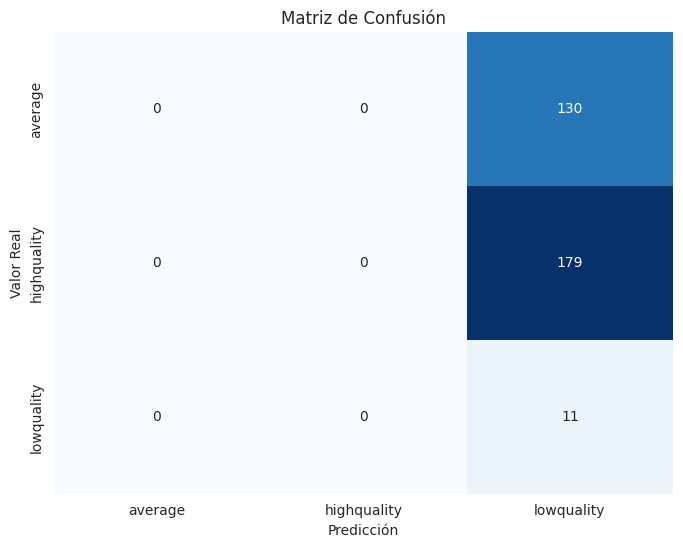

In [ ]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

confusion = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
axis_labels=label_encoder.classes_
sns.heatmap(confusion, annot=True, xticklabels=axis_labels, yticklabels=axis_labels, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

#### **K-Fold Cross Validation**

In [ ]:
# Inputs y Targets
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

k = 5
kfold = KFold(n_splits=k, shuffle=True)

acc_per_fold = []
loss_per_fold = []

# Evaluación de modelo usando K-Fold Cross Validation
fold_num = 1
for train, test in kfold.split(inputs, targets):

  # Definimos la arquitectura usada por el modelo
  model = Sequential()
  model.add(Dense(units=64, activation='tanh', input_shape=(12,)))
  model.add(Dense(units=32, activation='tanh'))
  model.add(Dense(units=3, activation='tanh'))

  # Compilamos el modelo
  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

  # Imprimimos cada fold
  print('------------------------------------------------------------------------')
  print(f'Entrenando para fold {fold_num} ...')

  # Entrenamos el modelo
  history = model.fit(inputs[train], targets[train],
              batch_size=32,
              epochs=20,
              verbose=False)

  # Generamos métricas
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Resultados para fold {fold_num}: {model.metrics_names[0]} de {scores[0]}; {model.metrics_names[1]} de {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Siguiente fold
  fold_num = fold_num + 1

print()
print(f'Loss promedio: {sum(loss_per_fold)/len(loss_per_fold)}')
print(f'Accuracy promedio: {sum(acc_per_fold)/len(acc_per_fold)}%')

# variables de tabla de comparacion
loss_clas_promedio_fold_tanH = sum(loss_per_fold)/len(loss_per_fold)
accuracy_clas_promedio_fold_tanH = sum(acc_per_fold)/len(acc_per_fold)

------------------------------------------------------------------------
Entrenando para fold 1 ...
Resultados para fold 1: loss de 1.01162588596344; accuracy de 38.12499940395355%
------------------------------------------------------------------------
Entrenando para fold 2 ...
Resultados para fold 2: loss de 0.7051666975021362; accuracy de 40.937501192092896%
------------------------------------------------------------------------
Entrenando para fold 3 ...
Resultados para fold 3: loss de 0.6044286489486694; accuracy de 55.31250238418579%
------------------------------------------------------------------------
Entrenando para fold 4 ...
Resultados para fold 4: loss de 0.6547977328300476; accuracy de 44.062501192092896%
------------------------------------------------------------------------
Entrenando para fold 5 ...
Resultados para fold 5: loss de 1.5663354396820068; accuracy de 5.329153686761856%

Loss promedio: 0.90847088098526
Accuracy promedio: 36.7533315718174%


Para esta métrica, se realiza un escalado de los valores para luego poder obtener un promedio significativo del accuracy medido por el método de cross-validation. Es importante señalar que a diferencia de lo obtenido en la matriz de confusión, en esta métrica se observa un rendimiento regular con tendencia a positivo.

### Regresión

Para el caso de regresión se utiliza exactamente el mismo modelo para mantener la integridad del experimento. Solamente se cambia el parámetro de función de activación para en este caso utilizar la función de tangente hiperbólica.

In [ ]:
# modelo secuencial "modelo_tanh"
# compila un modelo secuencial de redes neuronales con una capa de activación tangente hiperbólica y una capa de salida lineal
# la función de pérdida de error cuadrático medio y el optimizador SGD.
modelo_tanh = keras.models.Sequential([
    keras.layers.Dense(50, activation="tanh", input_shape=X_train_red.shape[1:]),
    keras.layers.Dense(1)
], name="modelo_tangente")
modelo_tanh.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
modelo_tanh.summary()

Model: "modelo_tangente"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 50)                600       
                                                                 
 dense_49 (Dense)            (None, 1)                 51        
                                                                 
Total params: 651
Trainable params: 651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Entrena el modelo modelo_tanh con los datos de entrenamiento durante 30 épocas
history = modelo_tanh.fit(X_train_red, y_train_red, epochs=30)

Epoch 1/30
35/35 [==============================] - 0s 2ms/step - loss: 2.5393
Epoch 2/30
35/35 [==============================] - 0s 1ms/step - loss: 0.7518
Epoch 3/30
35/35 [==============================] - 0s 1ms/step - loss: 0.6814
Epoch 4/30
35/35 [==============================] - 0s 2ms/step - loss: 0.6515
Epoch 5/30
35/35 [==============================] - 0s 1ms/step - loss: 0.6353
Epoch 6/30
35/35 [==============================] - 0s 2ms/step - loss: 0.6253
Epoch 7/30
35/35 [==============================] - 0s 2ms/step - loss: 0.6183
Epoch 8/30
35/35 [==============================] - 0s 2ms/step - loss: 0.6124
Epoch 9/30
35/35 [==============================] - 0s 1ms/step - loss: 0.6092
Epoch 10/30
35/35 [==============================] - 0s 2ms/step - loss: 0.6053
Epoch 11/30
35/35 [==============================] - 0s 1ms/step - loss: 0.6046
Epoch 12/30
35/35 [==============================] - 0s 1ms/step - loss: 0.6013
Epoch 13/30
35/35 [==============================

#### **Error cuadrático medio**

In [ ]:
# evalúa el modelo modelo_tanh en los datos de prueba y muestra el MSE resultante.
mse_test = modelo_tanh.evaluate(X_test_red, y_test_red)
print(f"MSE del modelo tangente hiperbólica: {mse_test}")

# variables de tabla de comparacion
Mse_reg_sigmoide_tanH = mse_test

15/15 [==============================] - 0s 2ms/step - loss: 0.5897
MSE del modelo tangente hiperbólica: 0.5897215604782104


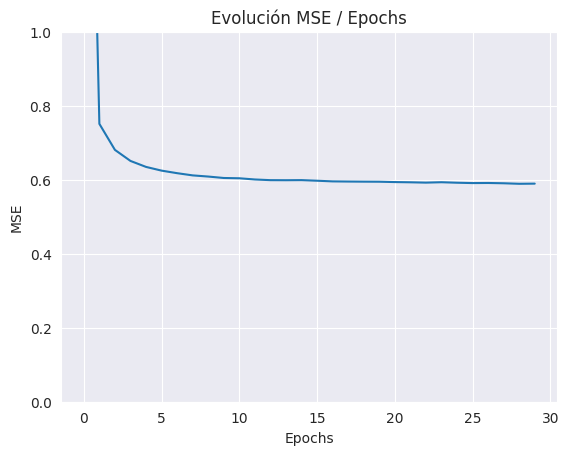

In [ ]:
# Gráfico que muestra la evolución de las métricas de entrenamiento a lo largo de las épocas para el modelo entrenado.
plt.plot(pd.DataFrame(history.history))
plt.title("Evolución MSE / Epochs")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

#### **K-Fold Cross Validation**

In [ ]:
# Inputs y Targets
inputs = np.concatenate((X_train_red, X_test_red), axis=0)
targets = np.concatenate((y_train_red, y_test_red), axis=0)

k = 5
kfold = KFold(n_splits=k, shuffle=True)

acc_per_fold = []
loss_per_fold = []

# Evaluación de modelo usando K-Fold Cross Validation
fold_num = 1
for train, test in kfold.split(inputs, targets):

  modelo_tanh = keras.models.Sequential([
  keras.layers.Dense(50, activation="tanh", input_shape=X_train_red.shape[1:]),
  keras.layers.Dense(1)
  ], name="modelo_tangente")

  # Compilamos el modelo
  modelo_tanh.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=['accuracy'])

  # Imprimimos cada fold
  print('------------------------------------------------------------------------')
  print(f'Entrenando para fold {fold_num} ...')

  # Entrenamos el modelo
  history = modelo_tanh.fit(inputs[train], targets[train],
              epochs=30,
              verbose=False)

  # Generamos métricas
  scores = modelo_tanh.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Resultados para fold {fold_num}: {modelo_tanh.metrics_names[0]} de {scores[0]}')
  loss_per_fold.append(scores[0])

  # Siguiente fold
  fold_num = fold_num + 1

print()
print(f'MSE promedio: {sum(loss_per_fold)/len(loss_per_fold)}')

# variables de tabla de comparacion
Mse_promedio_flod_tanH = sum(loss_per_fold)/len(loss_per_fold)

------------------------------------------------------------------------
Entrenando para fold 1 ...
Resultados para fold 1: loss de 0.6650692224502563
------------------------------------------------------------------------
Entrenando para fold 2 ...
Resultados para fold 2: loss de 0.6543375253677368
------------------------------------------------------------------------
Entrenando para fold 3 ...
Resultados para fold 3: loss de 0.6579592227935791
------------------------------------------------------------------------
Entrenando para fold 4 ...
Resultados para fold 4: loss de 0.5199742317199707
------------------------------------------------------------------------
Entrenando para fold 5 ...
Resultados para fold 5: loss de 0.5054137706756592

MSE promedio: 0.6005507946014405


#### **Predicciones realizadas por el modelo**

In [ ]:
# Conjunto de datos que contiene las características de prueba de "X_test_red"
X_test_red[475:481]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1468,7.3,0.48,0.32,2.1,0.062,31.0,54.0,0.99728,3.30,0.65,10.0
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0
1325,6.7,0.46,0.24,1.7,0.077,18.0,34.0,0.99480,3.39,0.60,10.6
514,10.5,0.51,0.64,2.4,0.107,6.0,15.0,0.99730,3.09,0.66,11.8
576,9.9,0.50,0.24,2.3,0.103,6.0,14.0,0.99780,3.34,0.52,10.0


In [ ]:
# Conjunto de valores objetivo que corresponden a los datos de prueba.
y_test_red[475:481]

1468    7
495     8
1325    6
514     7
576     4
Name: quality, dtype: int64

In [ ]:
# Se realiza predicciones utilizando el modelo "modelo_sigmoide" en el subconjunto de datos de prueba X_new
X_new = X_test_red[475:481]
y_pred = modelo_tanh.predict(X_new)
y_pred

1/1 [==============================] - 0s 56ms/step


array([[5.6511497],
       [5.7674665],
       [5.7807627],
       [5.883397 ],
       [5.8610854]], dtype=float32)

## Tabla Comparación entre funciones

#### **Clasificacion sigmoide vs tangente hiperbólica**

In [ ]:
# muestra los resultados en una forma tabular para su visualización

# Creando un diccionario de datos "clasificacion"
data_clasificacion = {'Metricas': ['Loss', 'Accuracy', 'Loss_Promedio_Fold', 'Accuracy_Promedio_Fold'],
        'Sigmoide': [loss_clas_sigmoide, accuracy_clas_sigmoide, loss_clas_promedio_fold_sigmoide, accuracy_clas_promedio_fold_sigmoide],
        'Tangente_Hiperbolica': [loss_clas_tanH, accuracy_clas_tanH, loss_clas_promedio_fold_tanH, accuracy_clas_promedio_fold_tanH]}

# Creando un DataFrame desde el diccionario
df = pd.DataFrame(data_clasificacion)

# Visualizando la tabla
print(df)

                 Metricas   Sigmoide  Tangente_Hiperbolica
0                    Loss   0.294854              0.554060
1                Accuracy   0.937500              0.034375
2      Loss_Promedio_Fold   0.366337              0.908471
3  Accuracy_Promedio_Fold  92.183778             36.753332


Con respecto a la clasificación, se observa una clara ventaja del modelo implementado con la función de activación sigmoide, tanto en las métricas "tradicionales", como en k-fold cross validation, ya que si bien no se observa tanta diferencia con respecto a la función de pérdida, observando el accuracy se puede notar un claro mejor desempeño para el modelo que utiliza la función sigmoide.

Esto se condice con lo observado al comparar ambas matrices de confusión. Mientras un modelo predice satisfactoriamente las clases *average* y *high quality*, pero presenta fallos en la clase *low quality*. El otro se comporta prácticamente como un clasificador "dummy", clasificando a todas las entradas como clase 2. Lo cual deriva en un muy pobre rendimiento de accuracy comparado a la función sigmoide.

#### **Regresion sigmoide vs tangente hiperbólica**



In [ ]:
# Creando un diccionario de datos
data_regresion = {'Metricas': ['MSE', 'MSE_Promedio_Fold'],
        'Sigmoide': [Mse_reg_sigmoide, Mse_promedio_flod_sigmoide],
        'Tangente_Hiperbolica': [Mse_reg_sigmoide_tanH, Mse_promedio_flod_tanH]}

# Creando un DataFrame desde el diccionario
df = pd.DataFrame(data_regresion)

# Visualizando la tabla
print(df)

            Metricas  Sigmoide  Tangente_Hiperbolica
0                MSE  0.593659              0.589722
1  MSE_Promedio_Fold  0.621494              0.600551


Luego con respecto a la regresión realizada por ambos modelos, se pueden observar resultados muy parecidos en ambas, con una muy leve ventaja de parte de la función sigmoide en la métrica tradicional, y por su parte un pequeño mejor desepeño para la función tanh en la validación k-fold cross validation.

Este desempeño se condice con las predicciones mostradas en las secciones anteriores, se observa una clara generalización de ambos modelos, los cuales tienden a predecir números de calidad de entre 5 y 6, que serían los valores de "media", esto ayuda en una gran cantidad de predicciones, sin embargo para calificaciones mayores, la predicción se aleja mucho de una salida medianamente correcta con respecto al valor real esperado.

# Dataset White

In [ ]:
# Muestra las primeras filas
dataset_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Label de clase
Se agrega la etiqueta `quality_class` que va a calificar cada vino en base al atributo `quality` en `LowQuality`, `Average` o `HighQuality`

In [ ]:
#extrae la columna 'quality' del dataset 'dataset_white'.
columnaQuality = dataset_white['quality']

# se aplica una función para asignar etiquetas de clasificación:
#'lowquality' si el valor es menor que 5
#'average' si es igual a 5
#'highquality' en cualquier otro caso.
columnaQuality = columnaQuality.apply(lambda x: 'LowQuality' if x < 5 else 'Average' if x == 5 else 'HighQuality')

# inserta una nueva columna llamada 'quality_class' en la posición 12 del dataset 'dataset_white'
dataset_white.insert(12, 'quality_class',np.array(columnaQuality))

In [ ]:
# muestra las primeras filas y la nueva columna "quality_class"
dataset_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_class
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,HighQuality
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,HighQuality
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,HighQuality
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,HighQuality
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,HighQuality


## Clasificación y regresión utilizando función sigmoidea

### Clasificación

Creamos un modelo de clasificación basado en redes neuronales, utilizando la función sigmoide como función de activación. La arquitectura del modelo consiste en una capa de entrada, una capa oculta densa con 64 neuronas, otra con 32 neuronas y una capa de salida con 3 neuronas correspondientes a cada clase.

In [ ]:
# Crea el dataset 'X_dataset_white' eliminando la columna 'quality_class' de 'dataset_white'
X_dataset_white = dataset_white.drop('quality_class', axis=1)

# Almacena las etiquetas 'quality_class' del dataset original
y = dataset_white['quality_class']

# Encode
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = keras.utils.to_categorical(y)

# Dividir los datos en sets de entrenamiento y de testing
X_train, X_test, y_train, y_test = train_test_split(X_dataset_white, y, test_size=0.2, random_state=42)

# Creamos el modelo
model = Sequential()

# Capa de entrada densa de 64 neuronas
model.add(Dense(units=64, activation='sigmoid', input_shape=(12,)))

# Capa oculta densa de 32 unidades
model.add(Dense(units=32, activation='sigmoid'))

# Capa de salida con 3 neuronas
num_classes = len(label_encoder.classes_)
model.add(Dense(units=num_classes, activation='sigmoid'))

# Compilamos el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamos el modelo con 20 épocas
model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

# Evaluamos el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# variables de tabla de comparacion
loss_clas_sigmoide = loss
accuracy_clas_sigmoide = accuracy


Epoch 1/20
123/123 [==============================] - 1s 4ms/step - loss: 0.8066 - accuracy: 0.6197 - val_loss: 0.7123 - val_accuracy: 0.6724
Epoch 2/20
123/123 [==============================] - 0s 3ms/step - loss: 0.7156 - accuracy: 0.6633 - val_loss: 0.6849 - val_accuracy: 0.6724
Epoch 3/20
123/123 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.6723 - val_loss: 0.6632 - val_accuracy: 0.6888
Epoch 4/20
123/123 [==============================] - 0s 3ms/step - loss: 0.6643 - accuracy: 0.6848 - val_loss: 0.6419 - val_accuracy: 0.6878
Epoch 5/20
123/123 [==============================] - 0s 3ms/step - loss: 0.6270 - accuracy: 0.7136 - val_loss: 0.6136 - val_accuracy: 0.7327
Epoch 6/20
123/123 [==============================] - 0s 3ms/step - loss: 0.5830 - accuracy: 0.7443 - val_loss: 0.5440 - val_accuracy: 0.7724
Epoch 7/20
123/123 [==============================] - 0s 3ms/step - loss: 0.5211 - accuracy: 0.7884 - val_loss: 0.4840 - val_accuracy: 0.7888
Epoch 

#### **Matriz de Confusión**

31/31 [==============================] - 0s 2ms/step


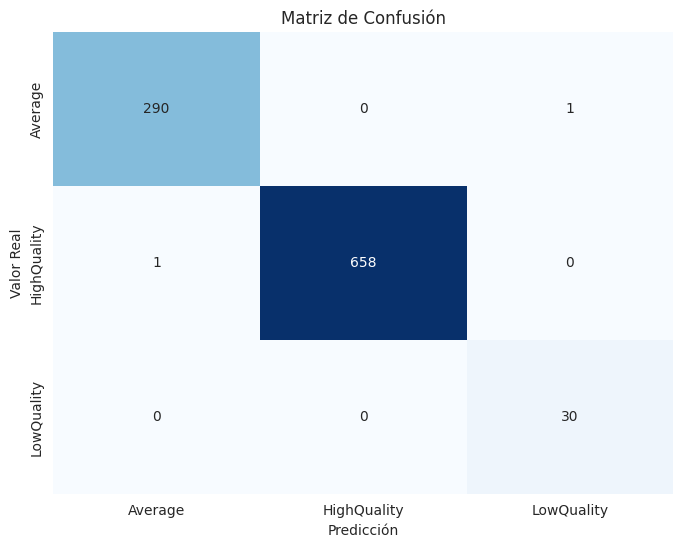

In [ ]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

confusion = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
axis_labels=label_encoder.classes_
sns.heatmap(confusion, annot=True, xticklabels=axis_labels, yticklabels=axis_labels, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

#### **K-Fold Cross Validation**

In [ ]:
# Inputs y Targets
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

k = 5
kfold = KFold(n_splits=k, shuffle=True)

acc_per_fold = []
loss_per_fold = []

# Evaluación de modelo usando K-Fold Cross Validation
fold_num = 1
for train, test in kfold.split(inputs, targets):

  # Definimos la arquitectura usada por el modelo
  model = Sequential()
  model.add(Dense(units=64, activation='sigmoid', input_shape=(12,)))
  model.add(Dense(units=32, activation='sigmoid'))
  model.add(Dense(units=3, activation='sigmoid'))

  # Compilamos el modelo
  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

  # Imprimimos cada fold
  print('------------------------------------------------------------------------')
  print(f'Entrenando para fold {fold_num} ...')

  # Entrenamos el modelo
  history = model.fit(inputs[train], targets[train],
              batch_size=32,
              epochs=20,
              verbose=False)

  # Generamos métricas
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Resultados para fold {fold_num}: {model.metrics_names[0]} de {scores[0]}; {model.metrics_names[1]} de {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Siguiente fold
  fold_num = fold_num + 1

print()
print(f'Loss promedio: {sum(loss_per_fold)/len(loss_per_fold)}')
print(f'Accuracy promedio: {sum(acc_per_fold)/len(acc_per_fold)}%')

# variables de tabla de comparacion
loss_clas_promedio_fold_sigmoide = sum(loss_per_fold)/len(loss_per_fold)
accuracy_clas_promedio_fold_sigmoide = sum(acc_per_fold)/len(acc_per_fold)

------------------------------------------------------------------------
Entrenando para fold 1 ...
Resultados para fold 1: loss de 0.05635302513837814; accuracy de 99.69387650489807%
------------------------------------------------------------------------
Entrenando para fold 2 ...
Resultados para fold 2: loss de 0.06607942283153534; accuracy de 99.79591965675354%
------------------------------------------------------------------------
Entrenando para fold 3 ...
Resultados para fold 3: loss de 0.07192368060350418; accuracy de 98.97959232330322%
------------------------------------------------------------------------
Entrenando para fold 4 ...
Resultados para fold 4: loss de 0.048713818192481995; accuracy de 99.48927760124207%
------------------------------------------------------------------------
Entrenando para fold 5 ...
Resultados para fold 5: loss de 0.08284159749746323; accuracy de 99.48927760124207%

Loss promedio: 0.06518230885267258
Accuracy promedio: 99.4895887374878%


### Regresión

Para este segundo dataframe, se utilizó practicamente el mismo modelo de la sección anterior, solamente se aumentó la cantidad de neuronas en la hidden layer de 50 a 70.

Lo anterior debido a que se observó que con 50 neuronas los resultados eran muy distantes al modelo anterior, con el aumento se obtienen métricas relativamente parecidas. Esto se podría atribuir al aumento en la cantidad de datos del dataframe.

In [ ]:
# crea una nueva variable 'X_white' que contiene todos los atributos excepto la columna 'quality'
X_white = dataset_white.drop('quality', axis=1)
#crea otra variable 'X_white' eliminando la columna 'quality_class' de 'X_white'
X_white = X_white.drop('quality_class', axis=1)
# Almacenar los valores de la columna 'quality' del dataset original
y_white = dataset_white['quality']
# Conjunto de datos en conjuntos de entrenamiento y prueba utilizando la función train_test_split
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=0.3, random_state=42)

In [ ]:
# Modelo secuencia "modelo_sigmoide"
# Compila un modelo secuencial de redes neuronales con una capa de activación sigmoide y una capa de salida lineal
# la función de pérdida de error cuadrático medio y el optimizador SGD.
modelo_sigmoide = keras.models.Sequential([
    keras.layers.Dense(70, activation="sigmoid", input_shape=X_train_white.shape[1:]),
    keras.layers.Dense(1)
], name="modelo_sigmoide")
modelo_sigmoide.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
modelo_sigmoide.summary()

Model: "modelo_sigmoide"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 70)                840       
                                                                 
 dense_79 (Dense)            (None, 1)                 71        
                                                                 
Total params: 911
Trainable params: 911
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Entrena el modelo modelo_sigmoide con los datos de entrenamiento durante 20 épocas
history = modelo_sigmoide.fit(X_train_white, y_train_white, epochs=30)

Epoch 1/30
108/108 [==============================] - 1s 2ms/step - loss: 2.7757
Epoch 2/30
108/108 [==============================] - 0s 2ms/step - loss: 0.7607
Epoch 3/30
108/108 [==============================] - 0s 2ms/step - loss: 0.7502
Epoch 4/30
108/108 [==============================] - 0s 2ms/step - loss: 0.7435
Epoch 5/30
108/108 [==============================] - 0s 2ms/step - loss: 0.7419
Epoch 6/30
108/108 [==============================] - 0s 2ms/step - loss: 0.7378
Epoch 7/30
108/108 [==============================] - 0s 2ms/step - loss: 0.7373
Epoch 8/30
108/108 [==============================] - 0s 1ms/step - loss: 0.7343
Epoch 9/30
108/108 [==============================] - 0s 2ms/step - loss: 0.7280
Epoch 10/30
108/108 [==============================] - 0s 2ms/step - loss: 0.7232
Epoch 11/30
108/108 [==============================] - 0s 2ms/step - loss: 0.7228
Epoch 12/30
108/108 [==============================] - 0s 2ms/step - loss: 0.7216
Epoch 13/30
108/108 [====

#### **Error cuadrático medio**

In [ ]:
# evalúa el modelo modelo_sigmoide en los datos de prueba y muestra el MSE resultante.
mse_test = modelo_sigmoide.evaluate(X_test_white, y_test_white)

print(f"MSE del modelo sigmoide: {mse_test}")

# variables de tabla de comparacion
Mse_reg_sigmoide = mse_test

46/46 [==============================] - 0s 1ms/step - loss: 0.7018
MSE del modelo sigmoide: 0.7017697095870972


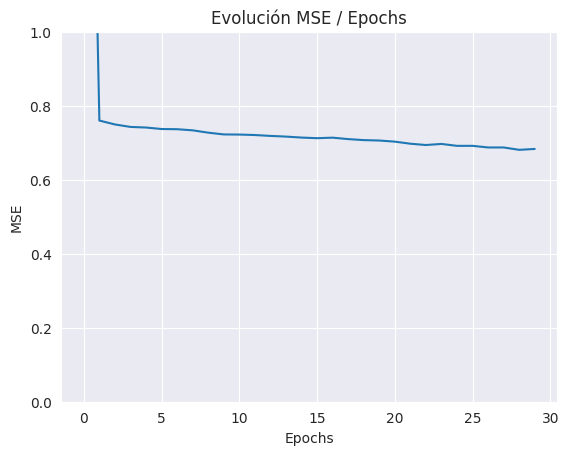

In [ ]:
# Gráfico que muestra la evolución de las métricas de entrenamiento a lo largo de las épocas para el modelo entrenado.
plt.plot(pd.DataFrame(history.history))
plt.title("Evolución MSE / Epochs")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

A diferencia del dataset anterior el cual era más pequeño, se observa cómo en este el algoritmo llega a su mínimo de función de pérdida en un punto considerablemente más alto.

#### **K-Fold Cross Validation**

In [ ]:
# Inputs y Targets
inputs = np.concatenate((X_train_white, X_test_white), axis=0)
targets = np.concatenate((y_train_white, y_test_white), axis=0)

k = 5
kfold = KFold(n_splits=k, shuffle=True)

acc_per_fold = []
loss_per_fold = []

# Evaluación de modelo usando K-Fold Cross Validation
fold_num = 1
for train, test in kfold.split(inputs, targets):

  # Definimos la arquitectura usada por el modelo
  modelo_sigmoide = keras.models.Sequential([
  keras.layers.Dense(70, activation="sigmoid", input_shape=X_train_white.shape[1:]),
  keras.layers.Dense(1)
  ], name="modelo_sigmoide")

  # Compilamos el modelo
  modelo_sigmoide.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=['accuracy'])

  # Imprimimos cada fold
  print('------------------------------------------------------------------------')
  print(f'Entrenando para fold {fold_num} ...')

  # Entrenamos el modelo
  history = modelo_sigmoide.fit(inputs[train], targets[train],
              epochs=30,
              verbose=False)

  # Generamos métricas
  scores = modelo_sigmoide.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Resultados para fold {fold_num}: {modelo_sigmoide.metrics_names[0]} de {scores[0]}')
  loss_per_fold.append(scores[0])

  # Siguiente fold
  fold_num = fold_num + 1

print()
print(f'MSE promedio: {sum(loss_per_fold)/len(loss_per_fold)}')

# variables de tabla de comparacion
Mse_promedio_flod_sigmoide = sum(loss_per_fold)/len(loss_per_fold)

------------------------------------------------------------------------
Entrenando para fold 1 ...
Resultados para fold 1: loss de 0.630146861076355
------------------------------------------------------------------------
Entrenando para fold 2 ...
Resultados para fold 2: loss de 0.6800608038902283
------------------------------------------------------------------------
Entrenando para fold 3 ...
Resultados para fold 3: loss de 0.7758554220199585
------------------------------------------------------------------------
Entrenando para fold 4 ...
Resultados para fold 4: loss de 0.6641197204589844
------------------------------------------------------------------------
Entrenando para fold 5 ...
Resultados para fold 5: loss de 0.6632206439971924

MSE promedio: 0.6826806902885437


#### **Predicciones realizadas por el modelo**

In [ ]:
# Conjunto de datos que contiene las características de prueba de "X_test_white"
X_test_white[0:5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
4656,6.0,0.29,0.41,10.8,0.048,55.0,149.0,0.99370,3.09,0.59,10.966667
3659,5.4,0.53,0.16,2.7,0.036,34.0,128.0,0.98856,3.20,0.53,13.200000
907,7.1,0.25,0.39,2.1,0.036,30.0,124.0,0.99080,3.28,0.43,12.200000
4352,7.3,0.28,0.35,1.6,0.054,31.0,148.0,0.99178,3.18,0.47,10.700000
3271,6.5,0.32,0.34,5.7,0.044,27.0,91.0,0.99184,3.28,0.60,12.000000


In [ ]:
# Conjunto de valores objetivo que corresponden a los datos de prueba.
y_test_white[0:5]

4656    7
3659    8
907     8
4352    5
3271    7
Name: quality, dtype: int64

In [ ]:
# Se realiza predicciones utilizando el modelo "modelo_sigmoide" en el subconjunto de datos de prueba X_new
X_new = X_test_white[0:5]
y_pred = modelo_sigmoide.predict(X_new)
y_pred

1/1 [==============================] - 0s 77ms/step


array([[6.0871487],
       [6.347174 ],
       [6.247281 ],
       [5.9619217],
       [6.335271 ]], dtype=float32)

## Clasificación y regresión utilizando función tangente hiperbólica

### Clasificación

Creamos un modelo de clasificación basado en redes neuronales utilizando la función $\tanh$ como función de activación. La arquitectura del modelo consiste en una capa de entrada, una capa oculta densa con 64 neuronas, otra con 32 neuronas y una capa de salida con 3 neuronas correspondientes a cada clase.

In [ ]:
# Crea el dataset 'X_dataset_white' eliminando la columna 'quality_class' de 'dataset_white'
X_dataset_white = dataset_white.drop('quality_class', axis=1)

# Almacena las etiquetas 'quality_class' del dataset original
y = dataset_white['quality_class']

# Encode
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = keras.utils.to_categorical(y)

# Dividir los datos en sets de entrenamiento y de testing
X_train, X_test, y_train, y_test = train_test_split(X_dataset_white, y, test_size=0.2, random_state=42)

# Creamos el modelo
model = Sequential()

# Capa de entrada
model.add(Dense(units=64, activation='tanh', input_shape=(12,)))

# Capa oculta
model.add(Dense(units=32, activation='tanh'))

# Capa de salida
num_classes = len(label_encoder.classes_)
model.add(Dense(units=num_classes, activation='tanh'))

# Compilamos el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamos el modelo con 20 épocas
model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

# Evaluamos el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# variables de tabla de comparacion
loss_clas_tanH = loss
accuracy_clas_tanH = accuracy

Epoch 1/20
123/123 [==============================] - 1s 4ms/step - loss: 3.0464 - accuracy: 0.3321 - val_loss: 4.7922 - val_accuracy: 0.2969
Epoch 2/20
123/123 [==============================] - 0s 3ms/step - loss: 4.7993 - accuracy: 0.2976 - val_loss: 4.7868 - val_accuracy: 0.2969
Epoch 3/20
123/123 [==============================] - 0s 3ms/step - loss: 4.7970 - accuracy: 0.2976 - val_loss: 4.7861 - val_accuracy: 0.2969
Epoch 4/20
123/123 [==============================] - 0s 2ms/step - loss: 4.7968 - accuracy: 0.2976 - val_loss: 4.7861 - val_accuracy: 0.2969
Epoch 5/20
123/123 [==============================] - 0s 3ms/step - loss: 4.7968 - accuracy: 0.2976 - val_loss: 4.7861 - val_accuracy: 0.2969
Epoch 6/20
123/123 [==============================] - 0s 3ms/step - loss: 4.7968 - accuracy: 0.2976 - val_loss: 4.7861 - val_accuracy: 0.2969
Epoch 7/20
123/123 [==============================] - 0s 3ms/step - loss: 4.7968 - accuracy: 0.2976 - val_loss: 4.7861 - val_accuracy: 0.2969
Epoch 

#### **Matriz de Confusión**

31/31 [==============================] - 0s 1ms/step


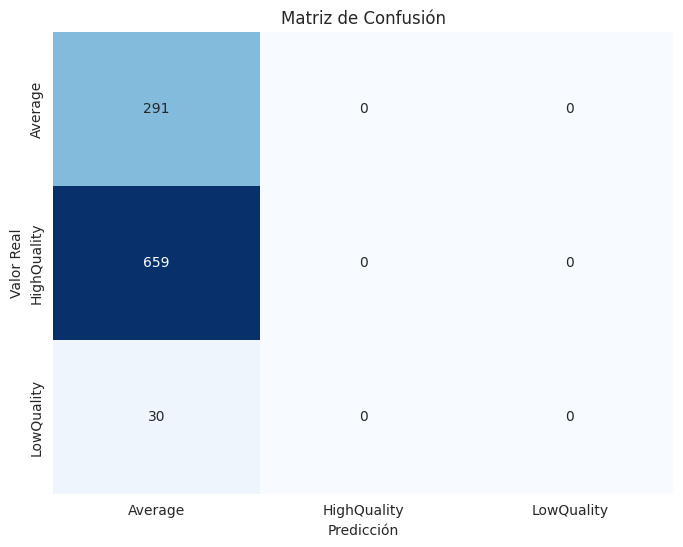

In [ ]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

confusion = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
axis_labels=label_encoder.classes_
sns.heatmap(confusion, annot=True, xticklabels=axis_labels, yticklabels=axis_labels, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

#### **K-Fold Cross Validation**

In [ ]:
# Inputs y Targets
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

k = 5
kfold = KFold(n_splits=k, shuffle=True)

acc_per_fold = []
loss_per_fold = []

# Evaluación de modelo usando K-Fold Cross Validation
fold_num = 1
for train, test in kfold.split(inputs, targets):

  # Definimos la arquitectura usada por el modelo
  model = Sequential()
  model.add(Dense(units=64, activation='tanh', input_shape=(12,)))
  model.add(Dense(units=32, activation='tanh'))
  model.add(Dense(units=3, activation='tanh'))

  # Compilamos el modelo
  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

  # Imprimimos cada fold
  print('------------------------------------------------------------------------')
  print(f'Entrenando para fold {fold_num} ...')

  # Entrenamos el modelo
  history = model.fit(inputs[train], targets[train],
              batch_size=32,
              epochs=20,
              verbose=False)

  # Generamos métricas
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Resultados para fold {fold_num}: {model.metrics_names[0]} de {scores[0]}; {model.metrics_names[1]} de {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Siguiente fold
  fold_num = fold_num + 1

print()
print(f'Loss promedio: {sum(loss_per_fold)/len(loss_per_fold)}')
print(f'Accuracy promedio: {sum(acc_per_fold)/len(acc_per_fold)}%')

# variables de tabla de comparacion
loss_clas_promedio_fold_tanH = sum(loss_per_fold)/len(loss_per_fold)
accuracy_clas_promedio_fold_tanH = sum(acc_per_fold)/len(acc_per_fold)

------------------------------------------------------------------------
Entrenando para fold 1 ...
Resultados para fold 1: loss de 0.6085407733917236; accuracy de 67.85714030265808%
------------------------------------------------------------------------
Entrenando para fold 2 ...
Resultados para fold 2: loss de 4.884769439697266; accuracy de 35.61224341392517%
------------------------------------------------------------------------
Entrenando para fold 3 ...
Resultados para fold 3: loss de 10.953726768493652; accuracy de 66.53061509132385%
------------------------------------------------------------------------
Entrenando para fold 4 ...
Resultados para fold 4: loss de 0.4774516224861145; accuracy de 66.90500378608704%
------------------------------------------------------------------------
Entrenando para fold 5 ...
Resultados para fold 5: loss de 0.6420897841453552; accuracy de 3.575076535344124%

Loss promedio: 3.5133156776428223
Accuracy promedio: 48.09601582586765%


Para esta métrica, se realiza un escalado de los valores para luego poder obtener un promedio significativo del accuracy medido por el método de cross-validation. Es importante señalar que a diferencia de lo obtenido en la matriz de confusión, en esta métrica se observa un rendimiento regular en la medición de loss, sin embargo en accuracy parece tener aún peor rendimiento que con la medida de testing inicialmente utilizada.

### Regresión

Para este caso se repite la arquitectura del modelo, solo se cambia la función de activación

In [ ]:
# modelo secuencial "modelo_tanh"
# compila un modelo secuencial de redes neuronales con una capa de activación tangente hiperbólica y una capa de salida lineal
# la función de pérdida de error cuadrático medio y el optimizador SGD.
modelo_tanh = keras.models.Sequential([
    keras.layers.Dense(70, activation="tanh", input_shape=X_train_red.shape[1:]),
    keras.layers.Dense(1)
], name="modelo_tangente")
modelo_tanh.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
modelo_tanh.summary()

Model: "modelo_tangente"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_108 (Dense)           (None, 70)                840       
                                                                 
 dense_109 (Dense)           (None, 1)                 71        
                                                                 
Total params: 911
Trainable params: 911
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Entrena el modelo modelo_tanh con los datos de entrenamiento durante 20 épocas
history = modelo_tanh.fit(X_train_white, y_train_white, epochs=30)

Epoch 1/30
108/108 [==============================] - 0s 2ms/step - loss: 1.0877
Epoch 2/30
108/108 [==============================] - 0s 2ms/step - loss: 0.7654
Epoch 3/30
108/108 [==============================] - 0s 1ms/step - loss: 0.7416
Epoch 4/30
108/108 [==============================] - 0s 1ms/step - loss: 0.7433
Epoch 5/30
108/108 [==============================] - 0s 2ms/step - loss: 0.7631
Epoch 6/30
108/108 [==============================] - 0s 2ms/step - loss: 0.7558
Epoch 7/30
108/108 [==============================] - 0s 2ms/step - loss: 0.7454
Epoch 8/30
108/108 [==============================] - 0s 2ms/step - loss: 0.7268
Epoch 9/30
108/108 [==============================] - 0s 1ms/step - loss: 0.7245
Epoch 10/30
108/108 [==============================] - 0s 2ms/step - loss: 0.7189
Epoch 11/30
108/108 [==============================] - 0s 2ms/step - loss: 0.7208
Epoch 12/30
108/108 [==============================] - 0s 2ms/step - loss: 0.7183
Epoch 13/30
108/108 [====

#### **Error cuadrático medio**

In [ ]:
# evalúa el modelo modelo_tanh en los datos de prueba y muestra el MSE resultante.
mse_test = modelo_tanh.evaluate(X_test_white, y_test_white)
print(f"MSE del modelo tangente hiperbólica: {mse_test}")

# variables de tabla de comparacion
Mse_reg_sigmoide_tanH = mse_test


46/46 [==============================] - 0s 1ms/step - loss: 0.7172
MSE del modelo tangente hiperbólica: 0.7171996831893921


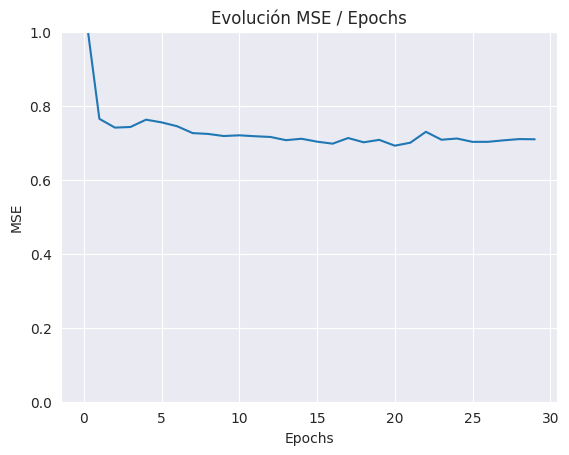

In [ ]:
# Gráfico que muestra la evolución de las métricas de entrenamiento a lo largo de las épocas para el modelo entrenado.
plt.plot(pd.DataFrame(history.history))
plt.title("Evolución MSE / Epochs")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Comparando con el gráfico anterior, se observa que el mínimo encontrado es prácticamente en el mismo valor, sin embargo la línea correspondiente a este segundo modelo presenta fluctuaciones considerablemente mayores, sin llegar a una línea "recta", como ocurría con el MSE anterior.

#### **K-Fold Cross Validation**

In [ ]:
# Inputs y Targets
inputs = np.concatenate((X_train_white, X_test_white), axis=0)
targets = np.concatenate((y_train_white, y_test_white), axis=0)

k = 5
kfold = KFold(n_splits=k, shuffle=True)

acc_per_fold = []
loss_per_fold = []

# Evaluación de modelo usando K-Fold Cross Validation
fold_num = 1
for train, test in kfold.split(inputs, targets):

  # Definimos la arquitectura usada por el modelo
  modelo_tanh = keras.models.Sequential([
  keras.layers.Dense(70, activation="tanh", input_shape=X_train_red.shape[1:]),
  keras.layers.Dense(1)
  ], name="modelo_tangente")

  # Compilamos el modelo
  modelo_tanh.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=['accuracy'])

  # Imprimimos cada fold
  print('------------------------------------------------------------------------')
  print(f'Entrenando para fold {fold_num} ...')

  # Entrenamos el modelo
  history = modelo_tanh.fit(inputs[train], targets[train],
              epochs=30,
              verbose=False)

  # Generamos métricas
  scores = modelo_tanh.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Resultados para fold {fold_num}: {modelo_tanh.metrics_names[0]} de {scores[0]}')
  loss_per_fold.append(scores[0])

  # Siguiente fold
  fold_num = fold_num + 1

print()
print(f'MSE promedio: {sum(loss_per_fold)/len(loss_per_fold)}')

# variables de tabla de comparacion
Mse_promedio_flod_tanH = sum(loss_per_fold)/len(loss_per_fold)

------------------------------------------------------------------------
Entrenando para fold 1 ...
Resultados para fold 1: loss de 0.6195148229598999
------------------------------------------------------------------------
Entrenando para fold 2 ...
Resultados para fold 2: loss de 0.6680569052696228
------------------------------------------------------------------------
Entrenando para fold 3 ...
Resultados para fold 3: loss de 0.7750471830368042
------------------------------------------------------------------------
Entrenando para fold 4 ...
Resultados para fold 4: loss de 0.7038190960884094
------------------------------------------------------------------------
Entrenando para fold 5 ...
Resultados para fold 5: loss de 0.7371153235435486

MSE promedio: 0.7007106661796569


#### **Predicciones realizadas por el modelo**

In [ ]:
# Conjunto de datos que contiene las características de prueba de "X_test_red"
X_test_white[0:5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
4656,6.0,0.29,0.41,10.8,0.048,55.0,149.0,0.99370,3.09,0.59,10.966667
3659,5.4,0.53,0.16,2.7,0.036,34.0,128.0,0.98856,3.20,0.53,13.200000
907,7.1,0.25,0.39,2.1,0.036,30.0,124.0,0.99080,3.28,0.43,12.200000
4352,7.3,0.28,0.35,1.6,0.054,31.0,148.0,0.99178,3.18,0.47,10.700000
3271,6.5,0.32,0.34,5.7,0.044,27.0,91.0,0.99184,3.28,0.60,12.000000


In [ ]:
# Conjunto de valores objetivo que corresponden a los datos de prueba.
y_test_white[0:5]

4656    7
3659    8
907     8
4352    5
3271    7
Name: quality, dtype: int64

In [ ]:
# Se realiza predicciones utilizando el modelo "modelo_sigmoide" en el subconjunto de datos de prueba X_new
X_new = X_test_red[0:5]
y_pred = modelo_tanh.predict(X_new)
y_pred

1/1 [==============================] - 0s 60ms/step


array([[5.6809206],
       [6.096872 ],
       [5.2887836],
       [6.052395 ],
       [5.491032 ]], dtype=float32)

## Tabla Comparación entre funciones

#### **Clasificacion sigmoide vs tangente hiperbólica**

In [ ]:
# muestra los resultados en una forma tabular para su visualización

# Creando un diccionario de datos "clasificacion"
data_clasificacion = {'Metricas': ['Loss', 'Accuracy', 'Loss_Promedio_Fold', 'Accuracy_Promedio_Fold'],
        'Sigmoide': [loss_clas_sigmoide, accuracy_clas_sigmoide, loss_clas_promedio_fold_sigmoide, accuracy_clas_promedio_fold_sigmoide],
        'Tangente_Hiperbolica': [loss_clas_tanH, accuracy_clas_tanH, loss_clas_promedio_fold_tanH, accuracy_clas_promedio_fold_tanH]}

#DataFrame
df = pd.DataFrame(data_clasificacion)

# Visualizando la tabla
print(df)

                 Metricas   Sigmoide  Tangente_Hiperbolica
0                    Loss   0.060867              4.786091
1                Accuracy   0.997959              0.296939
2      Loss_Promedio_Fold   0.065182              3.513316
3  Accuracy_Promedio_Fold  99.489589             48.096016


Para este segundo dataset, observando el rendimiento en cuanto a clasificación de los dos modelos, se observa una clara diferencia y ventaja para la función sigmoide, aún mayor que con el ejemplo de la sección anterior.

Estos resultados eran también de esperarse, ya que al poseer un mayor volúmen de datos de entrenamiento los modelos deberían poder ajustarse mejor y realizar clasifiaciones aún o más acertadas que antes.

Al observar las matrices de confusión conseguidas, se observa una mejora del modelo sigmoide en cuanto al reconocimiento de la clase *low quality*, mientras que al utilizar la tangente hiperbólica este se sigue comportando de forma parecida que con el dataset anterior, clasificando esta vez a los datos como solo de clase *high quality*, lo cual colocándolo en el contexto del problema significaría un grave problema, debido a que clasificaría vinos de calidad baja como altos.

#### **Regresion sigmoide vs tangente hiperbólica**

In [ ]:
# Creando un diccionario de datos "Regresion"
data_regresion = {'Metricas': ['MSE', 'MSE_Promedio_Fold'],
        'Sigmoide': [Mse_reg_sigmoide, Mse_promedio_flod_sigmoide],
        'Tangente_Hiperbolica': [Mse_reg_sigmoide_tanH, Mse_promedio_flod_tanH]}

# DataFrame
df = pd.DataFrame(data_regresion)

# Visualizando la tabla
print(df)

            Metricas  Sigmoide  Tangente_Hiperbolica
0                MSE  0.701770              0.717200
1  MSE_Promedio_Fold  0.682681              0.700711


En el caso de las regresiones, al igual que en la sección anterior se observa un rendimiento promedio y muy parecido entre los dos modelos, que se condice con las predicciones realizadas, siendo poco precisas y muy generalizadas. Sin embargo es de destacar que la función sigmoide realizaba predicciones de valores altos para los target esperados altos, siendo así un poco más "acertada". Por su lado el modelo tangente mantenía esta generalización mencionada.

# Conclusiones finales


* A modo de cierre, se podría concluir que para efectos de clasifiación el modelo sigmoide es altamente recomendable ya que es el que otorga mejores rendimientos para clasificaciones multiclase como es el caso de este laboratorio.

  Lo anterior se condice con las recomendaciones de la mayoría de fuentes de información, las cuales sugieren esta función de activación por sobre las otras debido a los valores de salida que esta provee, los cuales son entre 0 y 1. Esto es de alta utilidad para este tipo de problemas debido a que ayudan a la interpretación de estas salidas como una especie de probabilidad de pertenencia a una clase en particular, lo cual produce salidas más precisas que su contraparte.

  La función de tangente hiperbólica por su lado entrega valores entre un rango de -1 y 1, lo cual hace más dificil la interpretación de probabilidades de pertenencia.

  Es importante destacar que si bien el accuracy conseguido es un buen indicador, podría significar un sobreajuste del modelo a los datos, con lo cual se recomendaría volver a evaluarlo con otro set de datos a modo de validación.

* El rango de salida anteriormente mencionado de ambas funciones hace que estas sean poco útiles para problemas de regresión. Especialmente en un ejercicio como este donde la variación de los posibles target es bastante grande y queremos conseguir un valor continuo específico en un rango de salida como el de este laboratorio que va desde 0 a 10 (posibles calidades), y no un umbral de pertenencia que puede ser lo suficientemente amplio como para que el modelo sea eficaz, como es el caso de clasificación.

* Finalmente es necesario mencionar el caracter aleatorio de estos modelos, con lo cual la semilla aleatoria sería un parámetro más a considerar además del número de neuronas y capas.